In [5]:
using PyPlot #; pygui(true)

# Aufgabe1

### Teilaufgabe a

Mit $\vec{u} = \begin{pmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{pmatrix} = \begin{pmatrix} r \\ \dot r \\ \phi \\ \dot \phi \end{pmatrix}$ und $\frac{\partial V}{\partial r} = \frac{\dot r}{r^2}$ lässt sich die Differentialgleichung umformen zu:
\begin{align}
\frac{\partial}{\partial t} \begin{pmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{pmatrix} =
\begin{pmatrix} u_2 \\ u_1u_4^2-\frac{1}{mu_1^2} \\ u_4 \\ -2\frac{u_2u_4}{u_1^2} \end{pmatrix} = f
\end{align}


In [6]:
function euler(f, start, t, fargs = [])
    # f = zu Differenzierende Funktion; start = Anfangswertvektor (Aufsteigend in der Ordnung)
    ## t = Array der Zeititerationen; fargs = moegliche Argumente der Funktion
    steps = length(t)-1
    dt = (t[steps+1] - t[1])/(steps)
    order = length(start) # Ordnung der DGL
    result = Array(Float64, order, steps+1)
    result[:, 1] = start
    for i in 1:steps
        last_values = result[:, i] # Ergebnisse aus letzer Iterarion
        result[:,i+1] = last_values + dt * f(last_values..., fargs...) # Euler Schritt
    end
    return [result[i,:] for i in 1:order]
end

euler (generic function with 2 methods)

In [7]:
function f(u1, u2, u3, u4, m)
    return [u2, u1*u4^2-1/(m*u1^2), u4, -2*u2*u4/u1^2]
end
function rad2xy(radius, phi)
    N = length(radius)
    x = Array(Float64, N)
    y = Array(Float64, N)
    for i in 1:N
        x[i] = r[i]*cos(phi[i])
        y[i] = r[i]*sin(phi[i])
    end
    return [x, y]
end

rad2xy (generic function with 1 method)

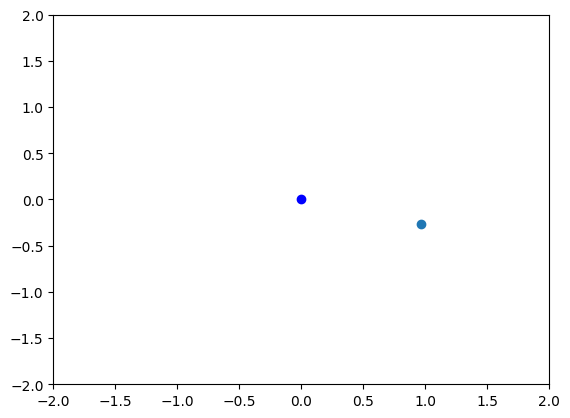

In [ ]:
t = linspace(0.,100., 1e3)
start = [1,0,0,1]
m = 1
(r, dr, phi, dphi) = euler(f, start, t, m)
(x, y) = rad2xy(r, phi)

fig = figure()
for n = 1:length(x)
    plot(0, 0, "bo", animated=true)
    plot(x[n], y[n], "o", animated=true)
    axis = gca()
    axis[:set_xlim]([-2,2])
    axis[:set_ylim]([-2,2])
    sleep(.1)
    IJulia.clear_output(true)
    display(fig)
    cla()
end


In [ ]:
for 